In [1]:
library(DirichletMultinomial)
library(lattice)
library(xtable)
library(tidyverse)

args = commandArgs(trailingOnly=TRUE)


fl='/tscc/nfs/home/hsher/ps-yeolab5/ABC_2rep_rerun/counts/genome/megatables/K562_rep6.tsv.gz'
annotation = '/tscc/projects/ps-yeolab4/software/skipper/1.0.0/bin/skipper/annotations/gencode.v38.annotation.k562_totalrna.gt1.tiled_partition.features.tsv.gz'
basedir= '/tscc/nfs/home/hsher/ps-yeolab5/ABC_2rep_rerun/'
out_stem = 'K562_rep6'
dir.create(basedir, showWarnings = FALSE, recursive = TRUE)

# fl = '/home/hsher/scratch/oligo_PE_iter5/DMN/table/oCLIP_10_1.tsv.gz'
# annotation = '/projects/ps-yeolab4/software/skipper/1.0.0/bin/skipper/annotations/gencode.v38.annotation.k562_totalrna.gt1.tiled_partition.features.tsv.gz'
# basedir='/home/hsher/scratch/oligo_PE_iter5/DMN/output'
# out_stem='oCLIP_10_1'

options(width=70, digits=2)
full <- FALSE ### TODO: change to TRUE
.qualitative <- DirichletMultinomial:::.qualitative
dev.off <- function(...) invisible(grDevices::dev.off(...))

min_component = 1
max_component = 50 #### How to estimate this?
component_gap = 5
min_read = 10 



count_df = read_tsv(fl)
sample_cols = colnames(count_df)
count_df$name=row.names(count_df)

print(head(count_df))
count_df = count_df[rowSums(count_df[,sample_cols])>min_read, ]
count <- as.matrix(count_df[, sample_cols]) 
print('count matrix nrows=')
print(nrow(count))

print('count matrix ncol=')
print(ncol(count))



Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10

# A tibble: 6 × 11
  K562_rep6.…¹ K562_…² K562_…³ K562_…⁴ K562_…⁵ K562_…⁶ K562_…⁷ K562_…⁸
         <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1           32      41       6      53      25      38      12      31
2           44      53       5      55      25      35      10      40
3           27      38       7      37      18      28       7      29
4           29      31       5      40      23      20       8      20
5            5      10       3       9       7       6       2       5
6            5       8       0      13       9       2       3       8
# … with 3 more variables: K562_rep6.LIN28B <dbl>,
#   K562_rep6.SF3B4 <dbl>, name <chr>, and abbreviated variable names
#   ¹​K562_rep6.IGF2BP2, ²​K562_rep6.RBFOX2, ³​K562_rep6.PUM2,
#   ⁴​K562_rep6.FAM120A, ⁵​K562_rep6.DDX3, ⁶​K562_rep6.ZC3H11A,
#   ⁷​K562_rep6.EIF3G, ⁸​K562_rep6.PRPF8
[1] "count matrix nrows="
[1] 138365
[1] "count matrix ncol="
[1] 10


In [2]:
# sample rows
################ MODEL SELECTION: SAMPLING ################
# sampled_counts = count[sample(nrow(count),size=500,replace=FALSE),]

# library(parallel)
# if (full) {
# sample_fit <- mclapply(seq(min_component, max_component, component_gap), dmn, count=sampled_counts, verbose=TRUE)
# save(sample_fit, file=file.path(basedir, paste0(out_stem, ".sample_fit.rda")))
# } else load(file = file.path(basedir, paste0(out_stem, ".sample_fit.rda")))

# # plot Laplace against k
# lplc <- sapply(sample_fit, laplace)
# aic <- sapply(sample_fit, AIC)
# bic <- sapply(sample_fit, BIC)
#  pdf(file.path(basedir, paste0(out_stem, ".goodness_of_sample_fit.pdf")))
#  plot(aic, type="b", xlab="Number of Dirichlet Components(k)",ylab="AIC")
#  plot(bic, type="b", xlab="Number of Dirichlet Components(k)",ylab="BIC")
#  plot(lplc, type="b", xlab="Number of Dirichlet Components(k)",ylab="Model Fit(Laplace)")
#  dev.off()

#   # find the best model: the DMN object
#  (best <- sample_fit[[which.min(lplc)]])

################ MODEL SELECTION ################

# fit data k=1 to max_component, using a subset of data
# library(parallel)
# cores = detectCores()
# if (full) {
# fit <- mclapply(seq(min_component, max_component, component_gap), dmn, count=count, verbose=TRUE, mc.cores = cores)
# save(fit, file=file.path(basedir, paste0(out_stem, ".fit.rda")))
# } else load(file = file.path(basedir, paste0(out_stem, ".fit.rda")))




In [3]:
load(file = "/tscc/nfs/home/hsher/ps-yeolab5/ABC_2rep_rerun/DMM/K562_rep6.fit.rda")

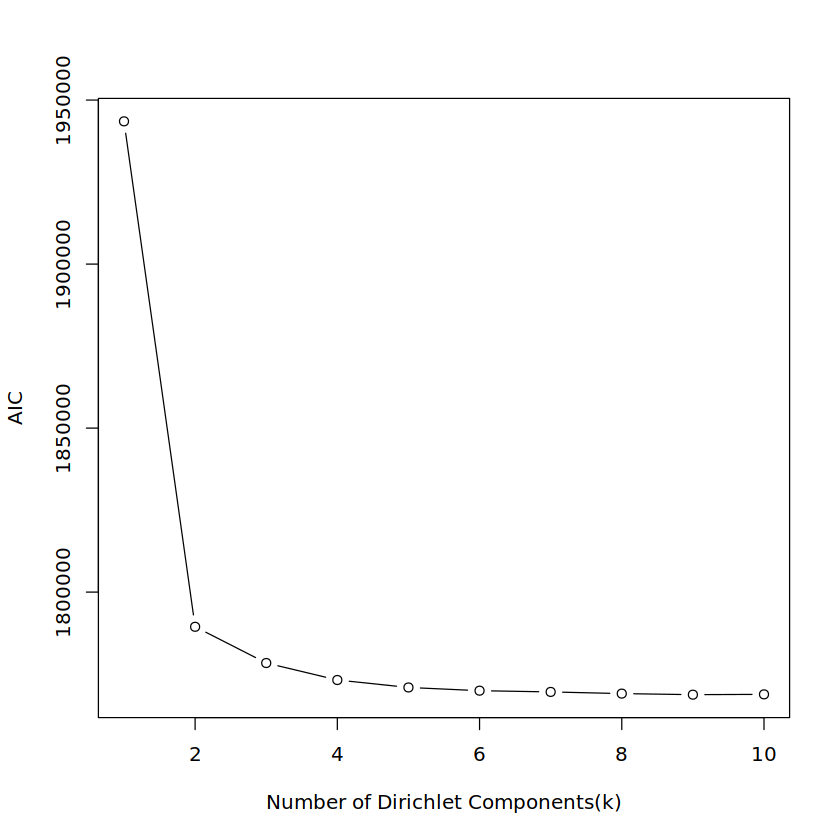

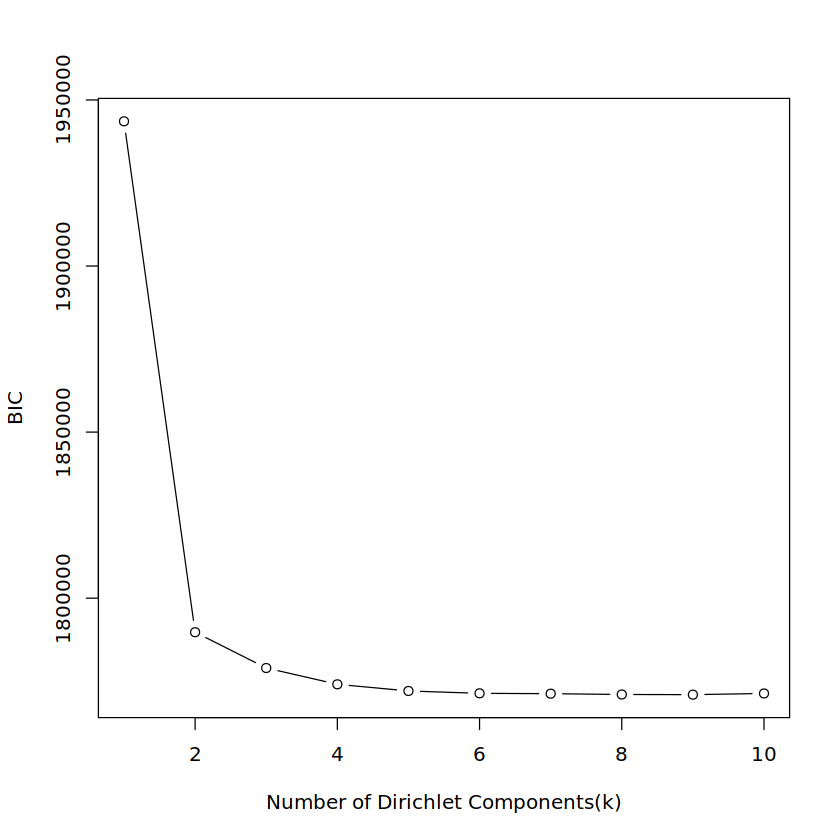

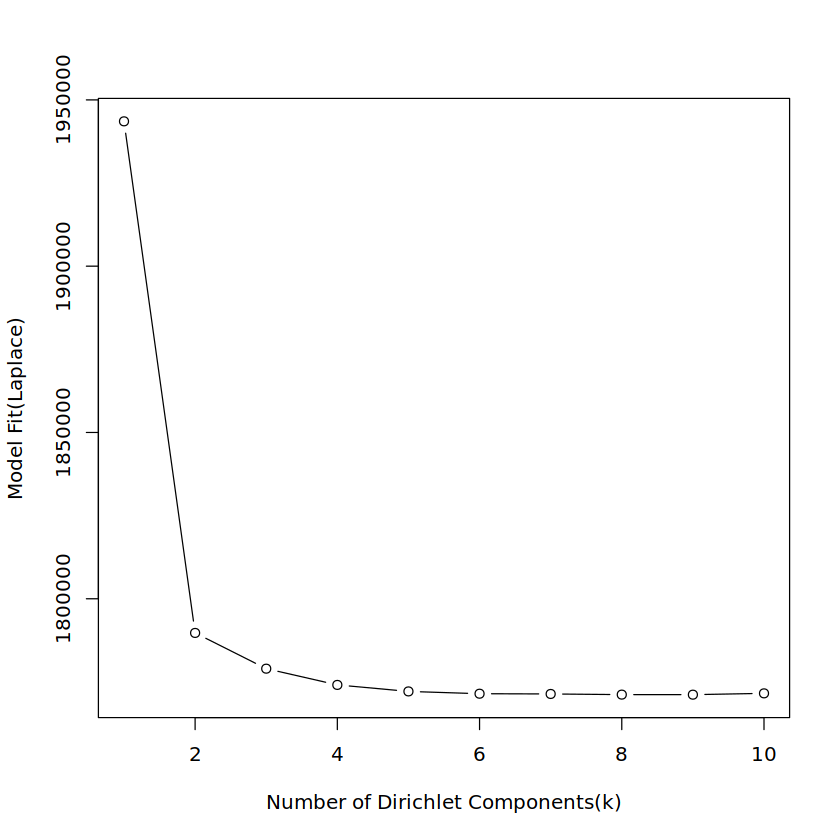

In [4]:



# plot Laplace against k
lplc <- sapply(fit, laplace)
aic <- sapply(fit, AIC)
bic <- sapply(fit, BIC)
 
 plot(aic, type="b", xlab="Number of Dirichlet Components(k)",ylab="AIC")
 plot(bic, type="b", xlab="Number of Dirichlet Components(k)",ylab="BIC")
 plot(lplc, type="b", xlab="Number of Dirichlet Components(k)",ylab="Model Fit(Laplace)")
 dev.off()



In [5]:
(best <- fit[[which.min(aic)]])

class: DMN 
k: 41 
samples x taxa: 138365 x 10 
Laplace: 1771161 BIC: 1770948 AIC: 1768735 

In [6]:
output_params <- function(best, out_stem, basedir){
    ################ CLUSTER SIZE ################
    # reports the weight $\pi$ and $\theta$
    # theta = \sum alphas, higher, more concentrated cluster
    weights = mixturewt(best)
    write_tsv(data.frame(weights) %>% rownames_to_column(), file.path(basedir, paste0(out_stem, '.weights.tsv')))
    
    ################ CLUSTER LABELLING ################
    # contribution of each taxonomic group to the Dirichlet components
    # fitted https://rdrr.io/bioc/DirichletMultinomial/man/fitted.html
    fitted_df = data.frame(fitted(best, assign = FALSE))%>% rownames_to_column()
    write_tsv(fitted_df, file.path(basedir, paste0(out_stem, '.alpha.tsv')))
    
    # write null
    fitted_df_null = data.frame(fitted(fit[[1]], assign = FALSE))%>% rownames_to_column()
    names(fitted_df_null) <- c('rowname', 'single_component_weight')
    write_tsv(fitted_df_null, file.path(basedir, paste0(out_stem, '.null.alpha.tsv')))
    
    # how does the model differ from a single component DMN
    p0 <- fitted(fit[[1]], scale=TRUE) # scale by theta
    p_best <- fitted(best, scale=TRUE)
    colnames(p_best) <- paste("m", 1:ncol(p_best), sep="")
    (meandiff <- colSums(abs(p_best - as.vector(p0)))) # the difference of each component to 1 single component (possibly the null)
    
    # export the component
    mixture_df = mixture(best, assign = FALSE) # sample by component matrix
    print(nrow(mixture_df))
    print(nrow(count_df))
    row.names(mixture_df) <- count_df$name
    
    
    # join annotation
    anno_df = read_tsv(annotation)
    annotated_mixture=merge(mixture_df, anno_df, by.x='row.names', by.y='name')
    print(nrow(annotated_mixture))
    write_tsv(data.frame(annotated_mixture) %>% rownames_to_column(), file.path(basedir, paste0(out_stem,'.mixture_weight.tsv')))


    return(mixture_df)
    }

In [7]:
anno_df = read_tsv(annotation)

Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
nrow(count_df)

[1] 138365

In [9]:
mixture_df = output_params(fit[[1]], paste0('K562_rep6.', 1), '/tscc/nfs/home/hsher//ps-yeolab5/DMM_K_params')

[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364


In [10]:
mixture_df

1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
10,1
11,1


In [11]:
for (i in 1:length(fit)){
    output_params(fit[[i]], paste0('K562_rep6.', i), '/tscc/nfs/home/hsher//ps-yeolab5/DMM_K_params/DMM')
    }

[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
[1] 138365
[1] 138365


Rows: 5926997 Columns: 17
── Column specification ──────────────────────────────────────────────
Delimiter: "\t"
chr (11): chrom, strand, feature_type_top, feature_types, gene_nam...
dbl  (6): start, end, name, score, feature_id, feature_bin

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 138364
